In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [41]:
df = pd.read_csv('data.csv')

# Pandas Conditions
qiskit = df['name'] == 'bench_qiskit'
qcgpu = df['name'] == 'bench_qcgpu'

# Get mean values
means_qcgpu = []
means_qiskit = []

for i in range(24):
    means_qcgpu.append(df[qcgpu & (df['num_qubits'] == i+1)]['time'].mean())
    means_qiskit.append(df[qiskit & (df['num_qubits'] == i+1)]['time'].mean())

means_qcgpu, means_qiskit

([0.11010548046657018,
  0.09064698219299316,
  0.08695545196533203,
  0.08644485473632812,
  0.09125757217407227,
  0.0953125272478376,
  0.10184180736541748,
  0.10962025324503581,
  0.11751798788706462,
  0.1272592067718506,
  0.13772968451182047,
  0.14962301254272461,
  0.16251921653747559,
  0.17610212167104086,
  0.1975455284118652,
  0.20673999786376954,
  0.22912651300430298,
  0.2455278237660726,
  0.2666392723719279,
  0.28809504508972167,
  0.30944401025772095,
  0.33376026153564453,
  0.3608846187591553,
  0.4265098174413045],
 [0.024445533752441406,
  0.02149840195973714,
  0.02544231414794922,
  0.03283779961722238,
  0.04428610801696777,
  0.0578308900197347,
  0.0724172592163086,
  0.0944892168045044,
  0.12003660202026367,
  0.14254631996154785,
  0.16588890552520752,
  0.20703978538513185,
  0.260273019472758,
  0.33838576078414917,
  0.4937381446361542,
  0.6199180126190186,
  0.8818848530451456,
  1.333906957081386,
  2.2690751552581787,
  4.036439228057861,
  7.64

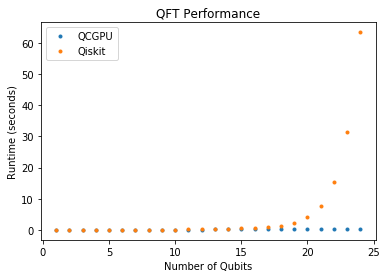

In [42]:
xdata = np.arange(1, 25)

plt.plot(xdata, means_qcgpu, ".", label="QCGPU")
plt.plot(xdata, means_qiskit, ".", label="Qiskit")

plt.legend()
plt.title('QFT Performance')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.show()

In [47]:
stats.wilcoxon(means_qcgpu, means_qiskit)

WilcoxonResult(statistic=61.0, pvalue=0.010995017215527)

In [48]:
stats.wilcoxon(df[qcgpu]['time'], df[qiskit]['time'])

ValueError: Unequal N in wilcoxon.  Aborting.